In [2]:
# LSTM 구조
# RNN의 한계점 -> rnn 구조에서 state Xt에는 Wxx가 계속 곱해지게 된다  -> exploding gradient(무한대로 발산), vanishing gradient(0으로 수렴)
#            -> loss가 inf일경우 학습이 더 이상 불가능 -> gradient clipping(상한선, 하안선)을 쓸 수 있으나 근본적인 해결 불가능
#            -> gradient가 0일경우 v.g인지 학습이 종료된건지 파악 불가능
#            -> 다른 네트워크 구조를 제안하는 것이 훨씬 편하다
# Long short-term memory -> 단기 기억을 오래 기억하기 위해 고안
# State space의 입력, 상태, 출력 구조는 동일, Gate 구조의 추가, 4개의 MLP구조

# LSTM: Four Regulations
# step 1(input gate): 새로운 입력과 이전 상태를 참조해서 이 정보를 얼마의 비율로 사용할 것인지를 결정 또는 얼마나 잊어버릴 것인가
# step 2(forget gate): 새로운 입력과 이전상태를 참조해서 이 정보들을 얼마나 활용할 것인가를 결정 또한 어떤 정보를 활용 할 것인가도 결정
# step 3(cell state): step2와 step3를 적절히 섞는다 -> cell
# step 4(output gate): 일련의 정보들을 모두 종합해서 다음 상태를 결정

# GRU:Simplification of LSTM
# LSTM의 간소화 버전 -> cell state가 없음
# LSTM보다 파라미터 수가 적으므로 training time이 절약된다
# LSTM보다 성능이 좋은가? -> Task에 따라 천차만별 but LSTM과 GRU가 RNN보다는 확실한 성능을 보장


In [3]:
# LSTM 신경망 훈련

# 데이터 준비
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train__input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train__input, val_input, train_target, val_target = train_test_split(train__input, train_target, test_size=0.2, random_state=42)

from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train__input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

2025-09-01 11:07:51.200297: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-01 11:07:51.325370: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-01 11:07:51.325414: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-01 11:07:51.326096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-01 11:07:51.379553: I tensorflow/core/platform/cpu_feature_g

In [4]:
#LSTM 셀을 사용한 순환층 만들기

import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

2025-09-01 11:07:55.262073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-01 11:07:55.321349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-01 11:07:55.321825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
# 모델 구조
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# lstm은 한 셀당 4개의 뉴런을 가지므로 파라메터는 simple rnn구조보다 4배 더 많은 800개

In [ ]:
# 모델 컴파일 및 훈련
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2025-09-01 11:07:57.045636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8904


  1/313 [..............................] - ETA: 8:16 - loss: 0.6935 - accuracy: 0.5156

2025-09-01 11:07:57.450647: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7132a7334fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-01 11:07:57.450671: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2025-09-01 11:07:57.455436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-01 11:07:57.531296: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - 7s 17ms/step - loss: 0.5862 - accuracy: 0.6895 - val_loss: 0.4882 - val_accuracy: 0.7706
Epoch 2/100
 13/313 [>.............................] - ETA: 3s - loss: 0.4857 - accuracy: 0.7620

/home/parkwooyeol/workspace/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.4596 - accuracy: 0.7901 - val_loss: 0.4534 - val_accuracy: 0.7894
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4362 - accuracy: 0.8022 - val_loss: 0.4673 - val_accuracy: 0.7892
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.4209 - accuracy: 0.8083 - val_loss: 0.4354 - val_accuracy: 0.7954
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4160 - accuracy: 0.8094 - val_loss: 0.4353 - val_accuracy: 0.7938
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4087 - accuracy: 0.8109 - val_loss: 0.4285 - val_accuracy: 0.8064
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4037 - accuracy: 0.8169 - val_loss: 0.4284 - val_accuracy: 0.8038
Epoch 8/100
313/313 [==============================] - 4s 11ms/step - loss: 0.3995 - accuracy: 0.8159 - val_loss: 0.4277 - val_accuracy: 0.8024
Epoch

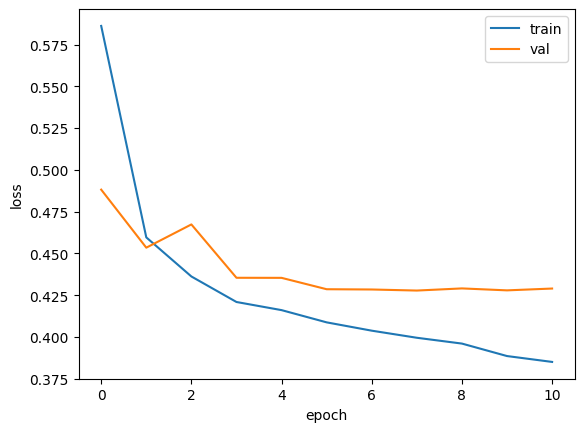

In [ ]:
# 검증 세트에 대한 정확도가 80% -> simpleRNN을 사용했을 때보다 향상

# 훈련손실 검증손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
# 순환층에 드롭아웃 적용하기

# SimpleRNN과 LSTM 클래스 모두 자체적으로 드롭아웃 기능 제공
# dropout 매개변수는 셀의 입력에 드롭아웃 적용
# recurrent_dropout은 순환되는 은닉상태에 드롭아웃 적용 -> GPU를 사용하여 모델 훈련 불가능

# dropout 사용 전체의 20%를 드랍
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500,16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# 동일한 조건으로 다시 훈련
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.5862 - accuracy: 0.6933 - val_loss: 0.4863 - val_accuracy: 0.7772
Epoch 2/100
 20/313 [>.............................] - ETA: 2s - loss: 0.4836 - accuracy: 0.7781

/home/parkwooyeol/workspace/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.4621 - accuracy: 0.7875 - val_loss: 0.4486 - val_accuracy: 0.7958
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.4420 - accuracy: 0.7965 - val_loss: 0.4496 - val_accuracy: 0.7882
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4307 - accuracy: 0.8029 - val_loss: 0.4359 - val_accuracy: 0.7998
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.4228 - accuracy: 0.8041 - val_loss: 0.4310 - val_accuracy: 0.8020
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4173 - accuracy: 0.8094 - val_loss: 0.4259 - val_accuracy: 0.8044
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4153 - accuracy: 0.8095 - val_loss: 0.4371 - val_accuracy: 0.7988
Epoch 8/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4110 - accuracy: 0.8105 - val_loss: 0.4289 - val_accuracy: 0.8044
Epoch

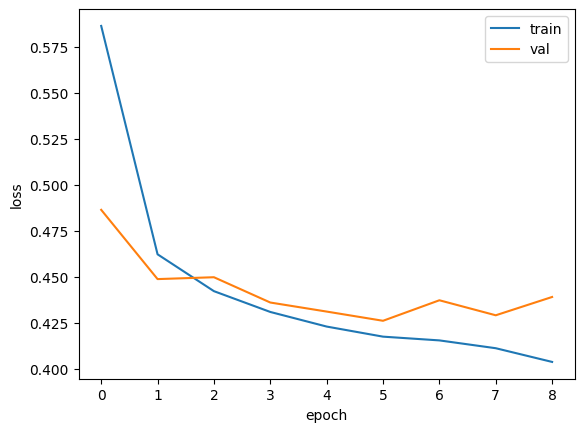

In [ ]:
# 훈련손실 검증손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# 검증 손실이 개선되지 않음 -> 여러 순환층을 쌓은 모델 필요

# 2개의 순환층 연결
model_21stm = keras.Sequential()
model_21stm.add(keras.layers.Input(shape=(100,)))
model_21stm.add(keras.layers.Embedding(500,16))
model_21stm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True)) # 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태 출력 -> return_sequences=True
model_21stm.add(keras.layers.LSTM(8, dropout=0.2))
model_21stm.add(keras.layers.Dense(1, activation='sigmoid'))
model_21stm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 모델 훈련
model_21stm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-21stm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_21stm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.5754 - accuracy: 0.6826 - val_loss: 0.4795 - val_accuracy: 0.7676
Epoch 2/100
 18/313 [>.............................] - ETA: 2s - loss: 0.4867 - accuracy: 0.7752

/home/parkwooyeol/workspace/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 18ms/step - loss: 0.4648 - accuracy: 0.7847 - val_loss: 0.4513 - val_accuracy: 0.7888
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4475 - accuracy: 0.7945 - val_loss: 0.4646 - val_accuracy: 0.7864
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.4377 - accuracy: 0.7978 - val_loss: 0.4421 - val_accuracy: 0.7996
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4325 - accuracy: 0.8032 - val_loss: 0.4447 - val_accuracy: 0.7904
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.4284 - accuracy: 0.8029 - val_loss: 0.4396 - val_accuracy: 0.7998
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4209 - accuracy: 0.8068 - val_loss: 0.4312 - val_accuracy: 0.8016
Epoch 8/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4167 - accuracy: 0.8074 - val_loss: 0.4526 - val_accuracy: 0.7918
Epoc

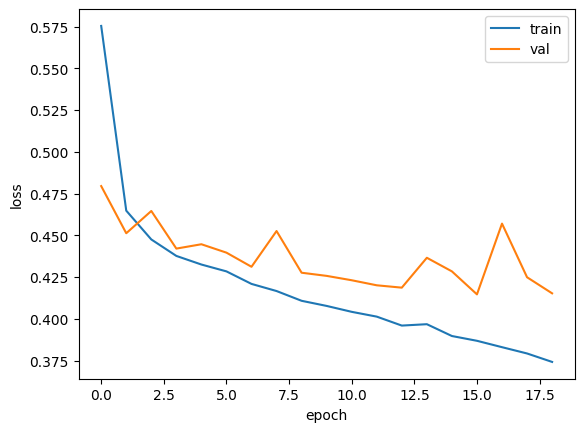

In [ ]:
# 훈련손실 검증손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
# GRU 신경망
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# 가중치 개수
# params = 3(1개의 셀에 작은셀 3개)*(입력*은닉연결 + 은닉*은닉(순환연결) + 바이어스) -> 총 624개

In [17]:
# GRU셀을 이용한 순환신경망
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6016 - accuracy: 0.6610 - val_loss: 0.4719 - val_accuracy: 0.7762
Epoch 2/100
 24/313 [=>............................] - ETA: 2s - loss: 0.4717 - accuracy: 0.7819

/home/parkwooyeol/workspace/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 0.4635 - accuracy: 0.7839 - val_loss: 0.4720 - val_accuracy: 0.7780
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.4412 - accuracy: 0.7988 - val_loss: 0.4370 - val_accuracy: 0.7944
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.4313 - accuracy: 0.8005 - val_loss: 0.4373 - val_accuracy: 0.7988
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4214 - accuracy: 0.8078 - val_loss: 0.4312 - val_accuracy: 0.8026
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4163 - accuracy: 0.8109 - val_loss: 0.4244 - val_accuracy: 0.8060
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4128 - accuracy: 0.8130 - val_loss: 0.4230 - val_accuracy: 0.8082
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4087 - accuracy: 0.8148 - val_loss: 0.4301 - val_accuracy: 0.7988
Epoch 9

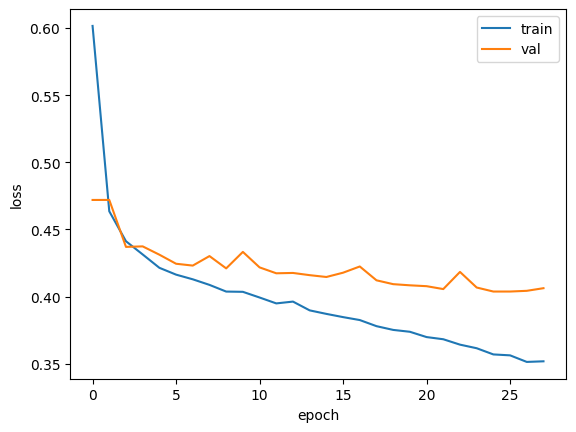

In [18]:
# 훈련손실 검증손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
# GRU 모델을 다시 로드하여 테스트 세트에 대한 성능 확인
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.h5')
best_model.evaluate(test_seq, test_target)

782/782 [==============================] - 4s 5ms/step - loss: 0.3964 - accuracy: 0.8190


[0.39638325572013855, 0.8189600110054016]